# Binary Predictive Modeling for Survivability of the Titanic

Vincent Luong

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.  The 'unsinkable' ship sank after a collision with an iceberg resulting in many deaths; however, it was determined some groups were more likely to survive than others.  With the dataset provided from Kaggle, we hope to discover a predictive model which can determine whether a passenger were to survive the sinking.


## Data
The dataset is composed of 12 explanatory variables with n = 891. <br>
<b>Explanatory Variables: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'<b>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

## Reading Data

In [2]:
train_dat = pd.read_csv('data/train.csv')
test_dat = pd.read_csv('data/test.csv')

##Column
train_dat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
#Summary Statistics of Variables
train_dat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_dat.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Taking a look at datatypes
train_dat.dtypes[train_dat.dtypes != 'object']

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [7]:
# Info for variables
train_dat.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Finding Survivability Grouped by Certain Variables

In [8]:
train_dat.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_dat.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In this dataset, a higher percentage of females were more likely to survive

In [10]:
train_dat.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
train_dat.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_dat.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_dat['Family_Size'] = train_dat['SibSp'] + train_dat['Parch'] + 1
test_dat['Family_Size'] = test_dat['SibSp'] + test_dat['Parch'] + 1

In [14]:
train_dat.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


We notice that family sized 1-4 were more likely to survive, we can mutate this data into group size

In [15]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_dat['Family_Size_Grouped'] = train_dat['Family_Size'].map(family_map)
test_dat['Family_Size_Grouped'] = test_dat['Family_Size'].map(family_map)

In [16]:
train_dat.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


## Data Wrangling and Histogram Creations

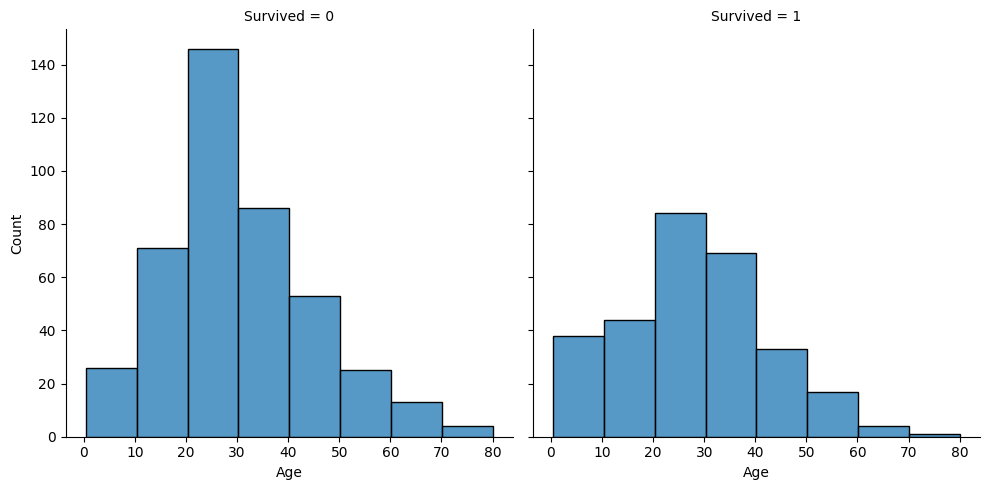

In [17]:
sns.displot(train_dat, x = 'Age', col = 'Survived', binwidth = 10, height=5)

In [18]:
train_dat['Age_Cut'] = pd.qcut(train_dat['Age'], 8)
test_dat['Age_Cut'] = pd.qcut(test_dat['Age'], 8)

In [19]:
train_dat.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [20]:
train_dat.loc[train_dat['Age'] <= 16, 'Age'] = 0
train_dat.loc[(train_dat['Age'] > 16) & (train_dat['Age'] <= 20.125), 'Age'] = 1
train_dat.loc[(train_dat['Age'] > 20.125) & (train_dat['Age'] <= 24), 'Age'] = 2
train_dat.loc[(train_dat['Age'] > 24) & (train_dat['Age'] <= 28), 'Age'] = 3
train_dat.loc[(train_dat['Age'] > 28) & (train_dat['Age'] <= 32.312), 'Age'] = 4
train_dat.loc[(train_dat['Age'] > 32.312) & (train_dat['Age'] <= 38), 'Age'] = 5
train_dat.loc[(train_dat['Age'] > 38) & (train_dat['Age'] <= 47), 'Age'] = 6
train_dat.loc[(train_dat['Age'] > 47) & (train_dat['Age'] <= 80), 'Age'] = 7
train_dat.loc[train_dat['Age'] > 80, 'Age'] 


test_dat.loc[test_dat['Age'] <= 16, 'Age'] = 0
test_dat.loc[(test_dat['Age'] > 16) & (test_dat['Age'] <= 20.125), 'Age'] = 1
test_dat.loc[(test_dat['Age'] > 20.125) & (test_dat['Age'] <= 24), 'Age'] = 2
test_dat.loc[(test_dat['Age'] > 24) & (test_dat['Age'] <= 28), 'Age'] = 3
test_dat.loc[(test_dat['Age'] > 28) & (test_dat['Age'] <= 32.312), 'Age'] = 4
test_dat.loc[(test_dat['Age'] > 32.312) & (test_dat['Age'] <= 38), 'Age'] = 5
test_dat.loc[(test_dat['Age'] > 38) & (test_dat['Age'] <= 47), 'Age'] = 6
test_dat.loc[(test_dat['Age'] > 47) & (test_dat['Age'] <= 80), 'Age'] = 7
test_dat.loc[test_dat['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

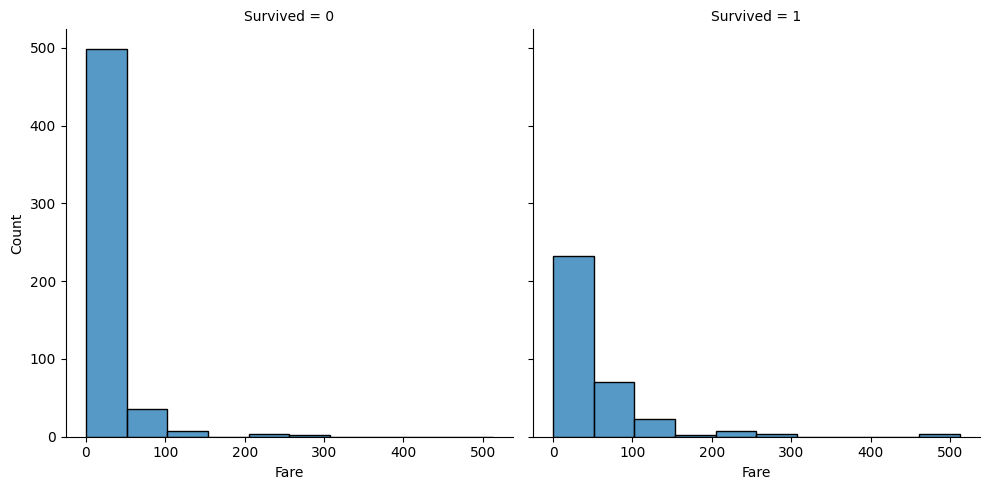

In [21]:
sns.displot(train_dat, x = 'Fare', col = 'Survived', binwidth = 50, height=5)

In [22]:
train_dat['Fare_Cut'] = pd.qcut(train_dat['Fare'], 6)
test_dat['Fare_Cut'] = pd.qcut(test_dat['Fare'], 6)

In [23]:
train_dat.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [24]:
train_dat.loc[train_dat['Fare'] <= 7.775, 'Fare'] = 0
train_dat.loc[(train_dat['Fare'] > 7.775) & (train_dat['Fare'] <= 8.662), 'Fare'] = 1
train_dat.loc[(train_dat['Fare'] > 8.662) & (train_dat['Fare'] <= 14.454), 'Fare'] = 2
train_dat.loc[(train_dat['Fare'] > 14.454) & (train_dat['Fare'] <= 26), 'Fare'] = 3
train_dat.loc[(train_dat['Fare'] > 26) & (train_dat['Fare'] <= 52.369), 'Fare'] = 4
train_dat.loc[(train_dat['Fare'] > 52.369) & (train_dat['Fare'] <= 512.329), 'Fare'] = 5
train_dat.loc[train_dat['Fare'] > 512.329, 'Fare'] 

test_dat.loc[test_dat['Fare'] <= 7.775, 'Fare'] = 0
test_dat.loc[(test_dat['Fare'] > 7.775) & (test_dat['Fare'] <= 8.662), 'Fare'] = 1
test_dat.loc[(test_dat['Fare'] > 8.662) & (test_dat['Fare'] <= 14.454), 'Fare'] = 2
test_dat.loc[(test_dat['Fare'] > 14.454) & (test_dat['Fare'] <= 26), 'Fare'] = 3
test_dat.loc[(test_dat['Fare'] > 26) & (test_dat['Fare'] <= 52.369), 'Fare'] = 4
test_dat.loc[(test_dat['Fare'] > 52.369) & (test_dat['Fare'] <= 512.329), 'Fare'] = 5
test_dat.loc[test_dat['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [25]:
train_dat['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
train_dat['Title'] = train_dat['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x:x.strip())
test_dat['Title'] = test_dat['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x:x.strip())

In [27]:
train_dat.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


The survivabiity rate of each person by title

In [28]:
train_dat['Title'] = train_dat['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_dat['Title'] = test_dat['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [29]:
train_dat.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [30]:
#NAME length mattered a lot more in the early 1900's
train_dat['Name_Length'] = train_dat['Name'].apply(lambda x: len(x))
test_dat['Name_Length'] = test_dat['Name'].apply(lambda x: len(x))

## Kernel Density Estimate

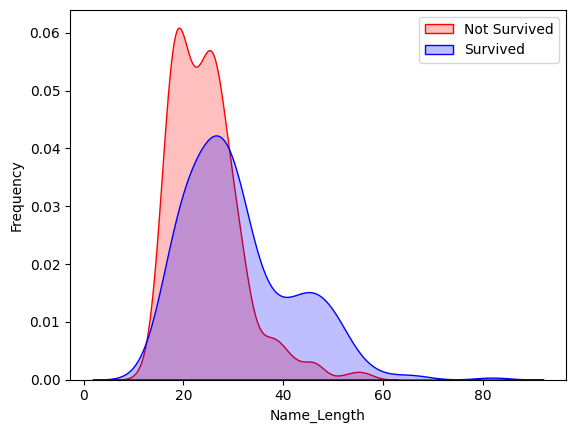

In [31]:
name_plot = sns.kdeplot(train_dat['Name_Length'][(train_dat['Survived']==0) & (train_dat['Name_Length'].notnull())], color='Red', fill=True)
name_plot = sns.kdeplot(train_dat['Name_Length'][(train_dat['Survived']==1) & (train_dat['Name_Length'].notnull())], ax=name_plot, color='Blue', fill=True)
name_plot.set_xlabel('Name_Length')
name_plot.set_ylabel('Frequency')
name_plot = name_plot.legend(['Not Survived', 'Survived'])

In [32]:
train_dat['Name_LengthGB'] = pd.qcut(train_dat['Name_Length'], 8)
test_dat['Name_LengthGB'] = pd.qcut(test_dat['Name_Length'], 8)

In [33]:
train_dat.groupby(['Name_LengthGB'], as_index=False)['Survived'].agg(['count', 'mean'])

,Name_LengthGB,count,mean
0,"(11.999, 18.0]",140,0.214286
1,"(18.0, 20.0]",103,0.252427
2,"(20.0, 23.0]",117,0.307692
3,"(23.0, 25.0]",98,0.346939
4,"(25.0, 27.25]",99,0.292929
5,"(27.25, 30.0]",112,0.428571
6,"(30.0, 38.0]",116,0.517241
7,"(38.0, 82.0]",106,0.745283


In [34]:
train_dat.loc[train_dat['Name_Length'] <= 18, 'Name_Size'] = 0
train_dat.loc[(train_dat['Name_Length'] > 18) & (train_dat['Name_Length'] <= 20), 'Name_Size'] = 1
train_dat.loc[(train_dat['Name_Length'] > 20) & (train_dat['Name_Length'] <= 23), 'Name_Size'] = 2
train_dat.loc[(train_dat['Name_Length'] > 23) & (train_dat['Name_Length'] <= 25), 'Name_Size'] = 3
train_dat.loc[(train_dat['Name_Length'] > 25) & (train_dat['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_dat.loc[(train_dat['Name_Length'] > 27.25) & (train_dat['Name_Length'] <= 30), 'Name_Size'] = 5
train_dat.loc[(train_dat['Name_Length'] > 30) & (train_dat['Name_Length'] <= 38), 'Name_Size'] = 6
train_dat.loc[(train_dat['Name_Length'] > 38) & (train_dat['Name_Length'] <= 82), 'Name_Size'] = 7
train_dat.loc[train_dat['Name_Length'] > 82, 'Name_Size'] 

test_dat.loc[test_dat['Name_Length'] <= 18, 'Name_Size'] = 0
test_dat.loc[(test_dat['Name_Length'] > 18) & (test_dat['Name_Length'] <= 20), 'Name_Size'] = 1
test_dat.loc[(test_dat['Name_Length'] > 20) & (test_dat['Name_Length'] <= 23), 'Name_Size'] = 2
test_dat.loc[(test_dat['Name_Length'] > 23) & (test_dat['Name_Length'] <= 25), 'Name_Size'] = 3
test_dat.loc[(test_dat['Name_Length'] > 25) & (test_dat['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_dat.loc[(test_dat['Name_Length'] > 27.25) & (test_dat['Name_Length'] <= 30), 'Name_Size'] = 5
test_dat.loc[(test_dat['Name_Length'] > 30) & (test_dat['Name_Length'] <= 38), 'Name_Size'] = 6
test_dat.loc[(test_dat['Name_Length'] > 38) & (test_dat['Name_Length'] <= 82), 'Name_Size'] = 7
test_dat.loc[test_dat['Name_Length'] > 82, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [35]:
train_dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


## Performing Data Wrangling on Ticket

In [36]:
train_dat['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [37]:
train_dat['TicketNumber'] = train_dat['Ticket'].apply(lambda x: pd.Series({'Ticket' : x.split()[-1]}))
test_dat['TicketNumber'] = test_dat['Ticket'].apply(lambda x: pd.Series({'Ticket' : x.split()[-1]}))

In [38]:
train_dat.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [39]:
train_dat.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [40]:
train_dat['TicketNumberCounts'] = train_dat.groupby('TicketNumber')['TicketNumber'].transform('count')
test_dat['TicketNumberCounts'] = test_dat.groupby('TicketNumber')['TicketNumber'].transform('count')

In [41]:
train_dat.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [42]:
train_dat['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [43]:
train_dat['Ticket'].str.split(pat = " ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [44]:
train_dat['TicketLocation'] = np.where(train_dat['Ticket'].str.split(pat = " ", expand = True)[1].notna(), train_dat['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_dat['TicketLocation'] = np.where(test_dat['Ticket'].str.split(pat = " ", expand = True)[1].notna(), test_dat['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [45]:
train_dat['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [46]:
train_dat['TicketLocation'] = train_dat['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

test_dat['TicketLocation'] = test_dat['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

In [47]:
train_dat.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


We didnt get any meaningful information from the `Ticket` varaible, but its good we have taken a look at this variable

## Performing Data Wrangling on Cabin

In [48]:
train_dat['Cabin'] = train_dat['Cabin'].fillna('U')
train_dat['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_dat['Cabin']])

test_dat['Cabin'] = test_dat['Cabin'].fillna('U')
test_dat['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_dat['Cabin']])

In [49]:
train_dat.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


Assigned Cabins have a higher survivability rate, we can mutate into a binary category

In [50]:
train_dat['Cabin_Assigned'] = train_dat['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_dat['Cabin_Assigned'] = test_dat['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [51]:
train_dat.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [52]:
train_dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [53]:
train_dat.shape

(891, 24)

In [54]:
test_dat.shape

(418, 23)

In [55]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [56]:
train_dat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [57]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

## Correlation Heatmap

<Axes: >

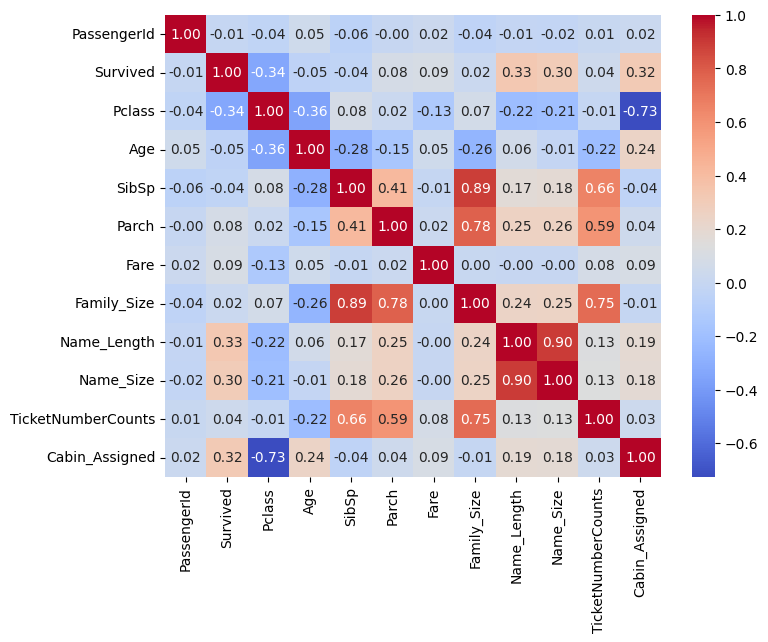

In [58]:
correlation_matrix = train_dat.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Filling in Missing Values

In [59]:
train_dat['Age'].fillna(train_dat['Age'].mean(), inplace = True)
test_dat['Age'].fillna(test_dat['Age'].mean(), inplace = True)
test_dat['Fare'].fillna(test_dat['Fare'].mean(), inplace = True)

In [60]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy = 'most_frequent')

In [61]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

*ode* used for inherent ranking on things, going to be used on Family Size <br>
*ohe* is not (e.g. Sex, Embarked)

## Creating Training/Testing Split Data

In [62]:
X = train_dat.drop(['Survived'], axis = 1)
y = train_dat['Survived']
X_test = test_dat.drop(['Age_Cut', 'Fare_Cut'], axis = 1)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 21)

## Running OHE and ODE for ML Techniques

In [64]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [65]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [66]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

## Random Forest Classifier

In [67]:
rfc = RandomForestClassifier()

In [73]:
param_grid_rfc = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [74]:
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, cv = StratifiedKFold(n_splits=5))

In [71]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)

In [72]:
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

## Decision Tree Classifier

In [76]:
dtc = DecisionTreeClassifier()

In [77]:
param_grid_dtc = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [78]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=StratifiedKFold(n_splits=5))

In [79]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [80]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8159854230276766
